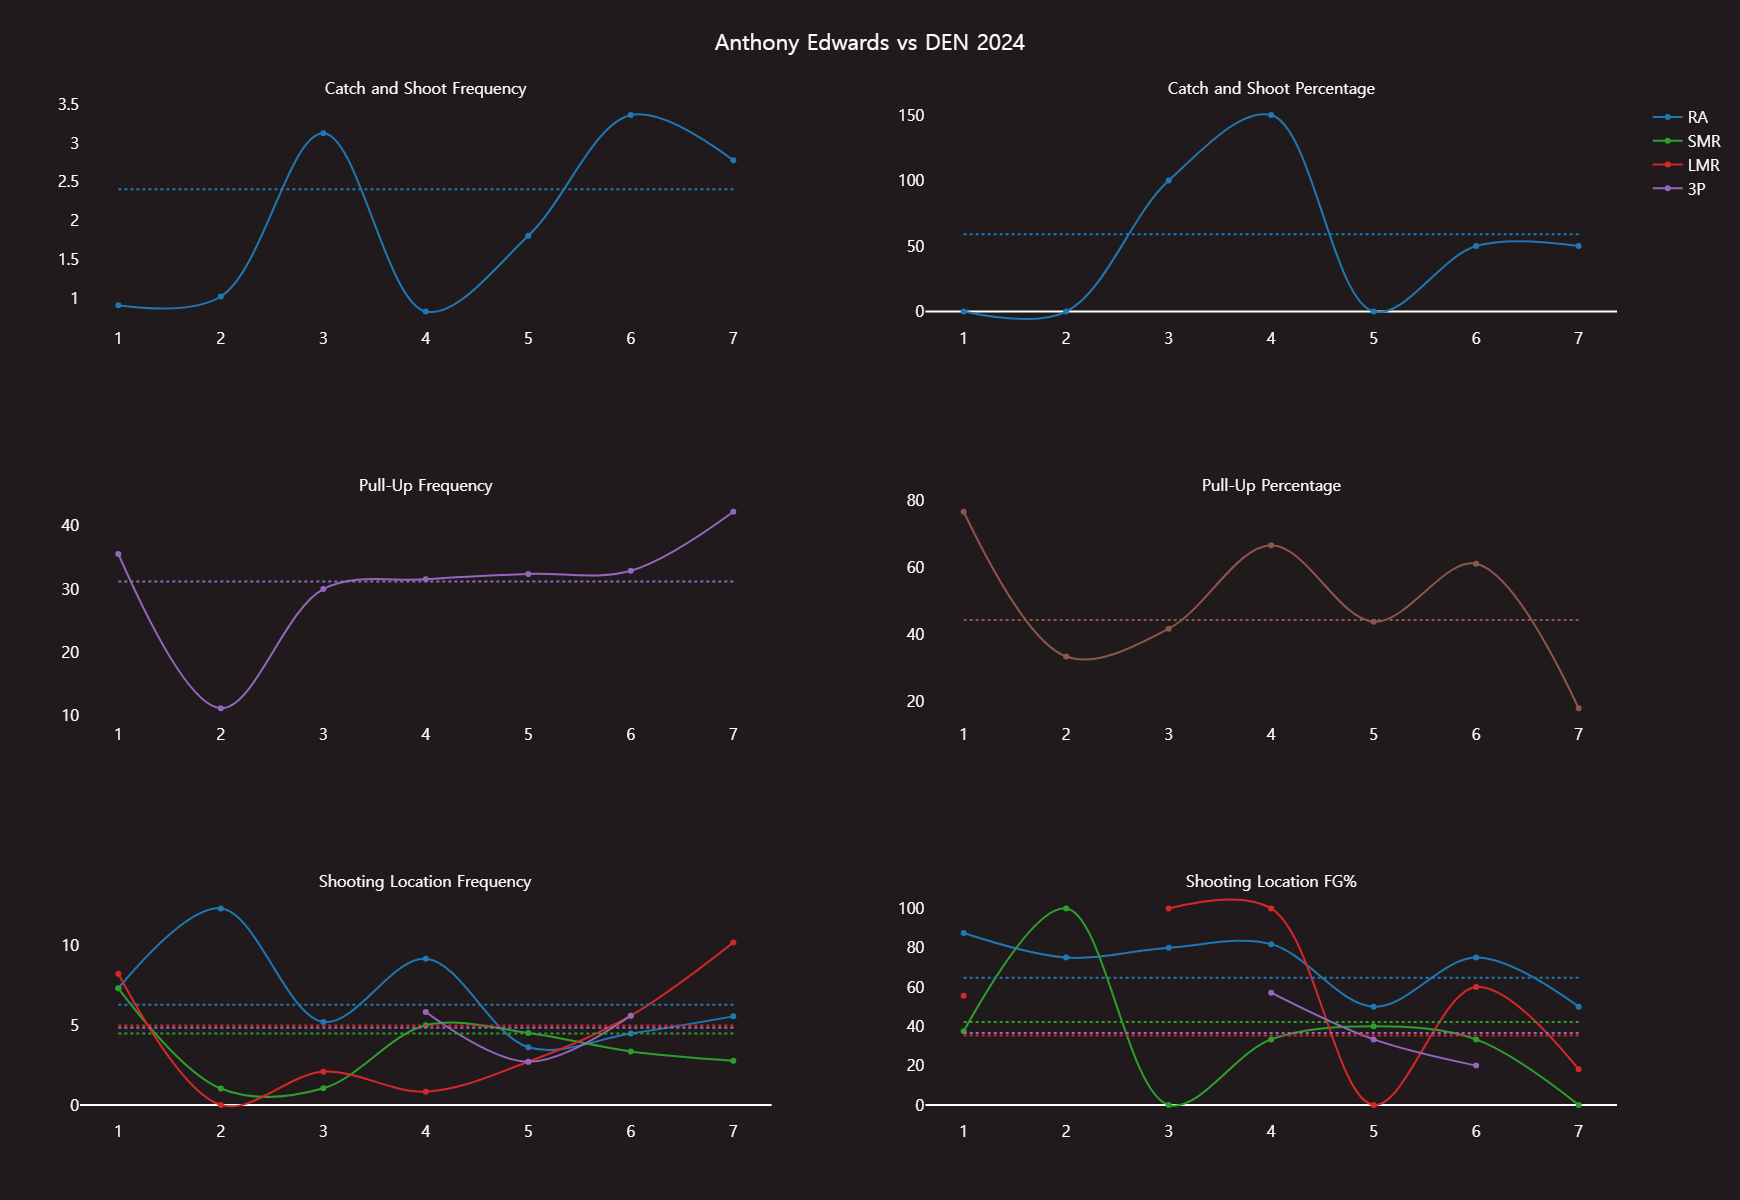

In [29]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def convert_to_full_team_names(team_string):
    # Dictionary mapping abbreviations to full NBA team names
    team_map = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BKN': 'Brooklyn Nets',
        'CHA': 'Charlotte Hornets',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOP': 'New Orleans Pelicans',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHX': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }


    # Split the input string into parts (team abbreviations and year)
    parts = team_string.split('_')

    # Extract team abbreviations (OKC, DAL) and ignore the year (2024)
    teams = parts[:-1]
    
    # Get the full team names using the dictionary
    full_team_names = [team_map.get(team, team) for team in teams]

    # Underline the first team name and join the rest with <br>
    full_team_names[0] = f"<span style='text-decoration:underline;'>{full_team_names[0]}</span>"

    full_team_names[0]= parts[-1]+' '+ full_team_names[0]


    full_team_names[1]= 'vs ' +full_team_names[1]
    
    
    # Join the full names with <br> and return
    return '<br>'.join(full_team_names)


def format_data_shot(series_data):
    series_data['rimfga']=series_data['RA_FGA']
    series_data['TSA']=series_data['FGA']+(series_data['FTA']*.44)
    series_data['ft_freq']=100* series_data['FTA']/series_data['TSA']
    series_data['rim_freq']=100* series_data['FGA_LT_5']/series_data['TSA']
    series_data['pullup_freq']=75* series_data['PULL_UP_FGA']/series_data['TSA']
    
    series_data['ft_rate']=75* series_data['FTA']/series_data['POSS']
    series_data['rim_rate']=75* series_data['FGA_LT_5']/series_data['POSS']
    series_data['pullup_rate']=75* series_data['PULL_UP_FGA']/series_data['POSS']   
    series_data['open_FG3_freq']=100* series_data['open_FG3A']/series_data['POSS']
    series_data['tight_FG3_freq']=100* (series_data['tight_FG3A']+series_data['very_tight_FG3A'])/series_data['POSS']
    series_data['wide_open_FG3_freq']=100* series_data['wide_open_FG3A']/series_data['POSS']

    series_data['on_ball_time']=75*series_data['TIME_OF_POSS']/series_data['POSS']
    
    series_data['catch_rate']=75*series_data['PASSES_RECEIVED']/series_data['POSS']
    series_data['pass_rate']=75*series_data['PASSES_MADE']/series_data['POSS']
    series_data['touch_rate']=75*series_data['TOUCHES']/series_data['POSS']   
    series_data['PULL_UP_EFG'] =100* (series_data['PULL_UP_FGM'] + 0.5 * series_data['PULL_UP_FG3M']) / series_data['PULL_UP_FGA']
    series_data['TS_PCT']*=100
    series_data['TOV_freq']=75* series_data['TOV']/series_data['POSS']
    series_data['score_rate']=75* series_data['PTS']/series_data['POSS']
    series_data['pot_ast_rate']= 75* series_data['POTENTIAL_AST']/series_data['POSS']
    
    series_data['open_FG3%']=100* series_data['open_FG3M']/series_data['open_FG3A']
    series_data['tight_FG3%']=100* series_data['tight_FG3M']/series_data['tight_FG3A']
    series_data['wide_open_FG3%']=100* series_data['wide_open_FG3M']/series_data['wide_open_FG3A']
    series_data['catch_shoot_vol']=75* series_data['CATCH_SHOOT_FGA']/series_data['POSS']
    series_data['catch_shoot_pct']=100*series_data['CATCH_SHOOT_EFG_PCT']
    series_data['ra_FGA_per75'] = (series_data['FGA_LT_5'] / series_data['POSS']) * 75
    series_data['ra_FG%'] = 100*series_data['FGM_LT_5'] / series_data['FGA_LT_5']

    # Short Mid-Range (SMR): 5-14 feet
    series_data['smr_FGA_per75'] = ((series_data['FGA_5_9'] + series_data['FGA_10_14']) / series_data['POSS']) * 75
    series_data['smr_FG%'] = 100*(series_data['FGM_5_9'] + series_data['FGM_10_14']) / (series_data['FGA_5_9'] + series_data['FGA_10_14'])

    # Long Mid-Range (LMR): 15-24 feet
    series_data['lmr_FGA_per75'] = ((series_data['FGA_15_19'] + series_data['FGA_20_24']) / series_data['POSS']) * 75
    series_data['lmr_FG%'] = 100*(series_data['FGM_15_19'] + series_data['FGM_20_24']) / (series_data['FGA_15_19'] + series_data['FGA_20_24'])

    # Three-Point Line (3PA): 25+ feet
    series_data['3PA_per75'] = ((series_data['FGA_25_29'] + series_data['FGA_30_34'] + series_data['FGA_35_39'] + series_data['FGA_40_PLUS']) / series_data['POSS']) * 75
    series_data['3PA_FG%'] = 100* (series_data['FGM_25_29'] + series_data['FGM_30_34'] + series_data['FGM_35_39'] + series_data['FGM_40_PLUS']) / (
                    series_data['FGA_25_29'] + series_data['FGA_30_34'] + series_data['FGA_35_39'] + series_data['FGA_40_PLUS'])
    

    return series_data

def player_series_shot(player_id, team, opp, year):
    player_id = int(player_id)
    file_name = team.upper() + '_' + opp.upper() + '_' + str(year)
    url_base = 'https://raw.githubusercontent.com/gabriel1200/shot_data/refs/heads/master/series/'

    df = pd.read_csv(url_base + 'data/' + file_name + '.csv')
    avg = pd.read_csv(url_base + str(year) + '_avg.csv')
    series_data = df[df['PLAYER_ID'] == player_id].reset_index(drop=True)
    avg_data = avg[avg['PLAYER_ID'] == player_id].reset_index(drop=True)
    name = series_data['PLAYER_NAME'].iloc[0]

    series_data['game_number'] = [i for i in range(1, len(series_data) + 1)]
    series_data = format_data_shot(series_data)
    avg_data = format_data_shot(avg_data)

    # Create a 2x3 subplot grid
    fig = make_subplots(rows=3, cols=2, subplot_titles=(
        "Catch and Shoot Frequency", "Catch and Shoot Percentage",
        "Pull-Up Frequency", "Pull-Up Percentage",
        "Shooting Location Frequency", "Shooting Location FG%"
    ))

    # 1. Three-Point Type Frequency (Wide Open, Open, Tight)


    # 2. Three-Point Percentages (Wide Open, Open, Tight)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['catch_shoot_vol'], showlegend=False,
                   mode='lines+markers', name='Wide Open 3P%', line=dict(shape='spline', width=2, color='#1f77b4')),
        row=1, col=1
    )

    # Horizontal line for season averages (dotted lines, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['catch_shoot_vol'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#1f77b4')),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['catch_shoot_pct'], showlegend=False,
                   mode='lines+markers', name='Wide Open 3P%', line=dict(shape='spline', width=2, color='#1f77b4')),
        row=1, col=2
    )

    # Horizontal line for season averages (dotted lines, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['catch_shoot_pct'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#1f77b4')),
        row=1, col=2
    )

    # 3. Pull-Up Frequency
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['pullup_freq'], showlegend=False,
                   mode='lines+markers', name='Pull-Up Frequency', line=dict(shape='spline', width=2, color='#9467bd')),
        row=2, col=1
    )
    # Horizontal line for season average (dotted line, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['pullup_freq'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#9467bd')),
        row=2, col=1
    )

    # 4. Pull-Up Percentage (eFG%)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['PULL_UP_EFG'], showlegend=False,
                   mode='lines+markers', name='Pull-Up eFG%', line=dict(shape='spline', width=2, color='#8c564b')),
        row=2, col=2
    )
    # Horizontal line for season average (dotted line, no legend)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['PULL_UP_EFG'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#8c564b')),
        row=2, col=2
    )

    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['ra_FGA_per75'], showlegend=False,
                   mode='lines+markers', name='RA Frequency', line=dict(shape='spline', width=2, color='#1f77b4')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['smr_FGA_per75'], showlegend=False,
                   mode='lines+markers', name='SMR Frequency', line=dict(shape='spline', width=2, color='#2ca02c')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['lmr_FGA_per75'], showlegend=False,
                   mode='lines+markers', name='LMR Frequency', line=dict(shape='spline', width=2, color='#d62728')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['3PA_per75'], showlegend=False,
                   mode='lines+markers', name='3PA Frequency', line=dict(shape='spline', width=2, color='#9467bd')),
        row=3, col=1
    )
    # Horizontal dotted lines for shooting location frequency season averages
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['ra_FGA_per75'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#1f77b4')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['smr_FGA_per75'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#2ca02c')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['lmr_FGA_per75'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#d62728')),
        row=3, col=1
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['3PA_per75'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#9467bd')),
        row=3, col=1
    )

    # 6. Shooting Location FG% (RA, SMR, LMR, 3PA)
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['ra_FG%'], showlegend=True,
                   mode='lines+markers', name='RA', line=dict(shape='spline', width=2, color='#1f77b4')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['smr_FG%'], showlegend=True,
                   mode='lines+markers', name='SMR', line=dict(shape='spline', width=2, color='#2ca02c')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['lmr_FG%'], showlegend=True,
                   mode='lines+markers', name='LMR', line=dict(shape='spline', width=2, color='#d62728')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=series_data['3PA_FG%'], showlegend=True,
                   mode='lines+markers', name='3P', line=dict(shape='spline', width=2, color='#9467bd')),
        row=3, col=2
    )
    # Horizontal dotted lines for shooting location FG% season averages
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['ra_FG%'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#1f77b4')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['smr_FG%'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#2ca02c')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['lmr_FG%'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#d62728')),
        row=3, col=2
    )
    fig.add_trace(
        go.Scatter(x=series_data['game_number'], y=[avg_data['3PA_FG%'].mean()] * len(series_data['game_number']),
                   mode='lines', showlegend=False, line=dict(dash='dot', width=2, color='#9467bd')),
        row=3, col=2
    )
    # Update the layout
    fig.update_layout(height=1200, width=1200, title_text=name+ ' vs '+opp.upper() + ' '+str(year),title_x=.5,title_font_size=22,
                      paper_bgcolor='#211a1d',plot_bgcolor='#211a1d', font=dict(
                family="Malgun Gothic",
                          size=16,
                color="#ffffff"
                ))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig

# Call the function and plot
fig = player_series_shot(1630162, 'min', 'den', 2024)
fig.show()

